In [ ]:
#Authors

"""
Avikal Sagar (as6804)
Luke Demo (lbd2127)
"""

# New Section

In [ ]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from prophet import Prophet

In [ ]:
#Uploading dataset 
from google.colab import files
uploaded = files.upload()

Saving Cleaned NYC Ferry Ridership Data_rev1.csv to Cleaned NYC Ferry Ridership Data_rev1 (1).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Importing dataset
"""import io
df = pd.read_csv(io.BytesIO(uploaded['Cleaned NYC Ferry Ridership Data_rev1.csv']))"""
#df = pd.read_csv(io.BytesIO(uploaded['Cleaned NYC Ferry Ridership Data.csv']))"""

"import io\ndf = pd.read_csv(io.BytesIO(uploaded['Cleaned NYC Ferry Ridership Data_rev1.csv']))"

In [ ]:
"""
IMPORTANT:

#Alternatively, you could download the dataset in your PC
#And upload it here under files (on the left hand side)
#And run this code:



"""
df = pd.read_csv("Cleaned NYC Ferry Ridership Data_rev1.csv")

In [ ]:
#Checking if the dataset was saved as a Pandas dataframe
df

,Unnamed: 0.1,Unnamed: 0,Date,Hour,Route,Direction,Stop,Boardings,TypeDay
0,0,0,2021-07-01,5,RW,NB,Rockaway,20.0,Weekday
1,1,1,2021-07-01,5,RW,NB,Sunset Park/BAT,3.0,Weekday
2,2,2,2021-07-01,5,SV,SB,East 34th Street,1.0,Weekday
3,3,3,2021-07-01,5,SV,SB,East 90th St,0.0,Weekday
4,4,4,2021-07-01,5,SV,SB,Soundview,32.0,Weekday
...,...,...,...,...,...,...,...,...,...
1745520,1872013,1872243,2023-01-31,22,ER,SB,Wall St/Pier 11,0.0,Weekday
1745521,1872014,1872244,2023-01-31,22,ER,SB,Dumbo/Fulton Ferry,0.0,Weekday
1745522,1872015,1872245,2023-01-31,22,ER,SB,Greenpoint,0.0,Weekday
1745523,1872016,1872246,2023-01-31,22,SG,NB,Midtown West/W 39th St-Pier 79,0.0,Weekday


In [ ]:
#Information about the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745525 entries, 0 to 1745524
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0.1  int64  
 1   Unnamed: 0    int64  
 2   Date          object 
 3   Hour          int64  
 4   Route         object 
 5   Direction     object 
 6   Stop          object 
 7   Boardings     float64
 8   TypeDay       object 
dtypes: float64(1), int64(3), object(5)
memory usage: 119.9+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
monthly_data = df.resample('M', on='Date')['Boardings'].sum()

monthly_data.index = monthly_data.index.strftime('%b %Y')

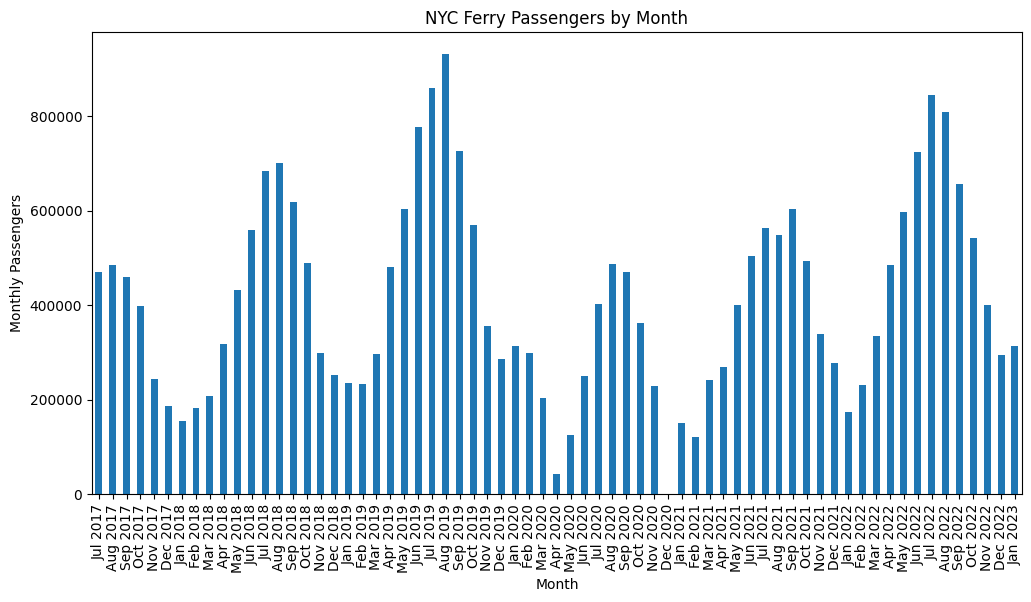

In [ ]:
# Create a bar chart of the monthly data
fig = plt.figure(figsize=(12, 6))
monthly_data.plot(kind='bar', stacked = True)

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Monthly Passengers')
plt.title('NYC Ferry Passengers by Month')

# Show the plot
plt.show()

In [ ]:
print(df['Route'].value_counts())
print()
print(df['Direction'].value_counts())
print()
print(df['Stop'].value_counts())
print()
print(df['TypeDay'].value_counts())
print()

ER    424052
SB    394619
AS    364326
SV    232745
RW    180819
LE     92459
SG     48063
GI      8238
RR       204
Name: Route, dtype: int64

SB    874184
NB    871341
Name: Direction, dtype: int64

Wall St/Pier 11                   312624
East 34th Street                  190018
Sunset Park/BAT                   120107
Dumbo/BBP Pier 1                   87189
Long Island City                   80545
East 90th St                       74433
North Williamsburg                 64720
Hunters Point South                61235
Red Hook/Atlantic Basin            61030
Bay Ridge                          60984
South Williamsburg                 60644
Rockaway                           60344
Atlantic Ave/BBP Pier 6            60230
Astoria                            59004
Roosevelt Island                   58845
Soundview                          47955
Stuyvesant Cove                    47717
Corlears Hook                      47277
Greenpoint                         46722
Brooklyn Navy Yard  

In [ ]:
Routes = ['ER', 'SB', 'AS', 'SV', 'RW', 'LE', 'SG', 'GI', 'RR']
Direction = ['NB', 'SB']
Stops = ['Wall St/Pier 11', 'East 34th Street', 'Sunset Park/BAT', 'Dumbo/BBP Pier 1',
         'Long Island City', 'East 90th St', 'North Williamsburg', 'Hunters Point South', 'Red Hook/Atlantic Basin',
         'Bay Ridge', 'South Williamsburg', 'Rockaway', 'Atlantic Ave/BBP Pier 6', 'Astoria', 'Roosevelt Island',
         'Soundview', 'Stuyvesant Cove', 'Corlears Hook', 'Greenpoint', 'Brooklyn Navy Yard', 'Dumbo/Fulton Ferry', 
         'St. George', 'Battery Park City/Vesey St.', 'Midtown West/W 39th St-Pier 79', 'Ferry Point Park', 
         'Gov. Island/Yankee Pier', 'Governors Island']
DayType = ['Weekday', 'Weekend']

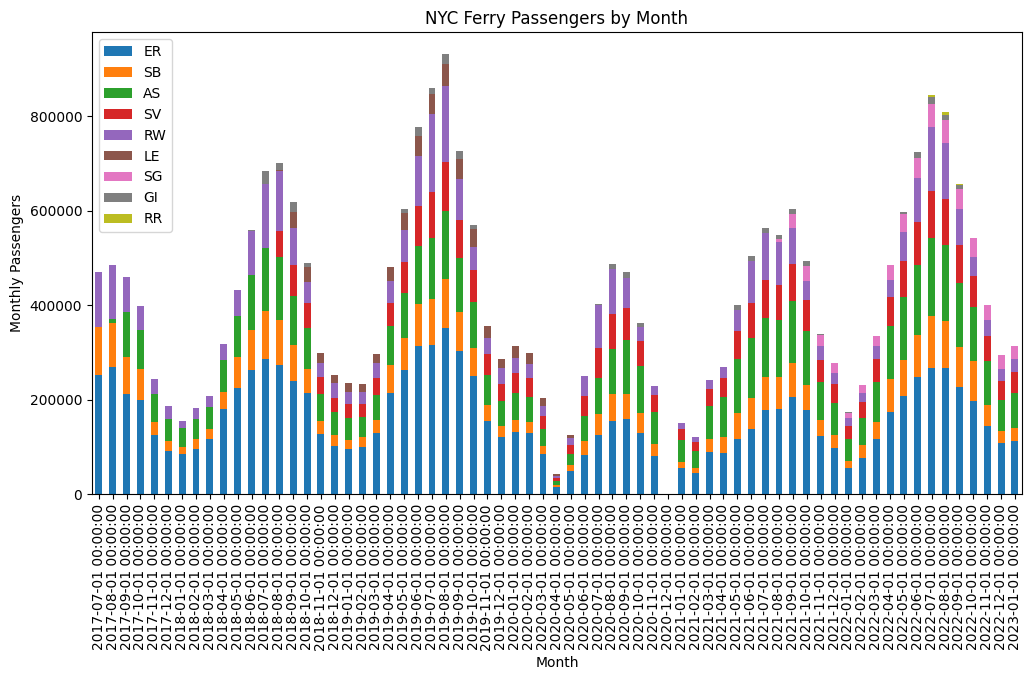

In [ ]:
# Create a dictionary to store the data for each route
route_data = {}

# Iterate through the routes and extract the monthly boarding data
for item in Routes:
    tmp = df.loc[df['Route'] == item]
    tmp_monthly_data = tmp.resample('M', on='Date')['Boardings'].sum()

    # Convert the index to month-year format
    tmp_monthly_data.index = tmp_monthly_data.index.strftime('%b %Y')
    
    # Store the data in the route_data dictionary
    route_data[item] = tmp_monthly_data
    
# Convert the dictionary to a DataFrame
stacked_data = pd.DataFrame(route_data)

# Convert the index to datetime format and sort it
stacked_data.index = pd.to_datetime(stacked_data.index, format='%b %Y')
stacked_data = stacked_data.sort_index()

# Create a stacked bar graph of the monthly data
fig, ax = plt.subplots(figsize=(12,6))
stacked_data.plot(kind='bar', stacked=True, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Passengers')
ax.set_title('NYC Ferry Passengers by Month')

# Show the plot
plt.show()

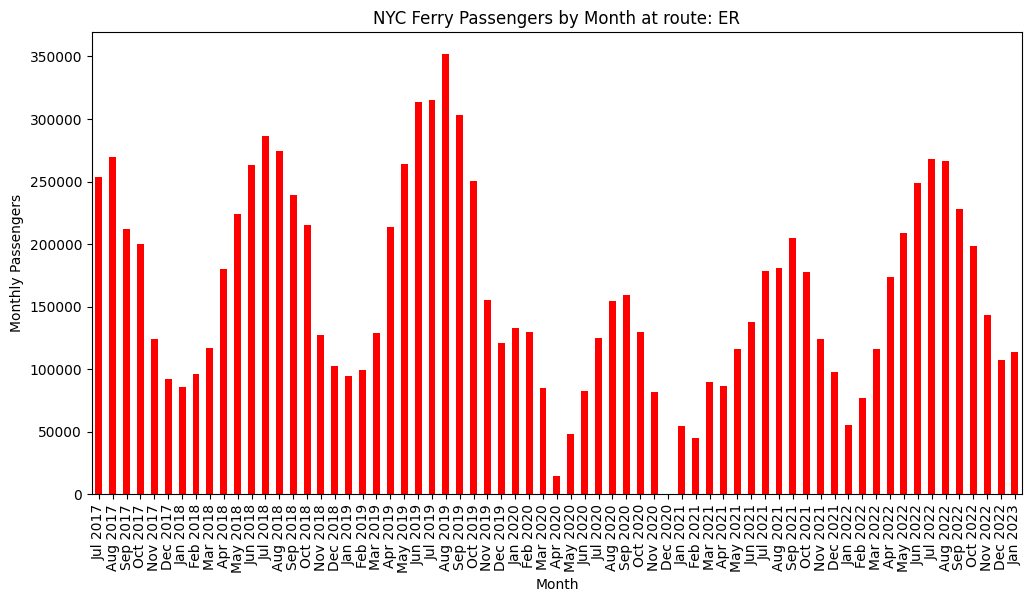

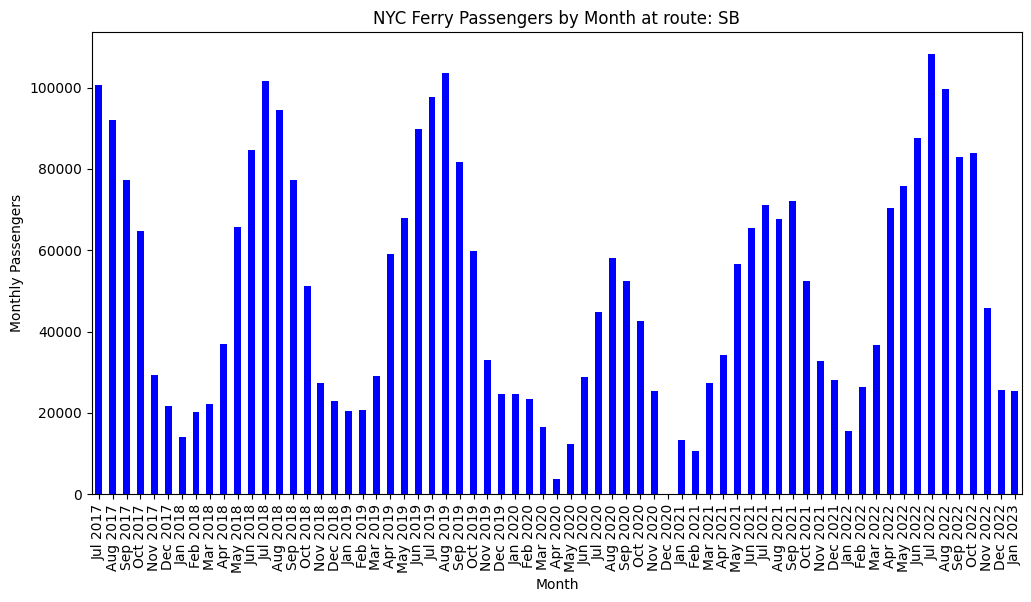

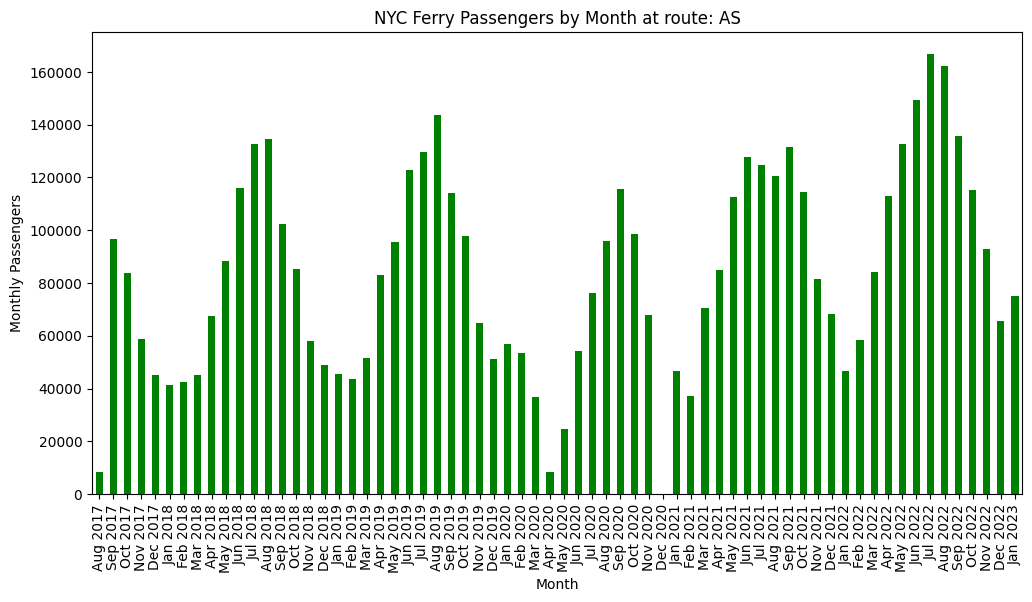

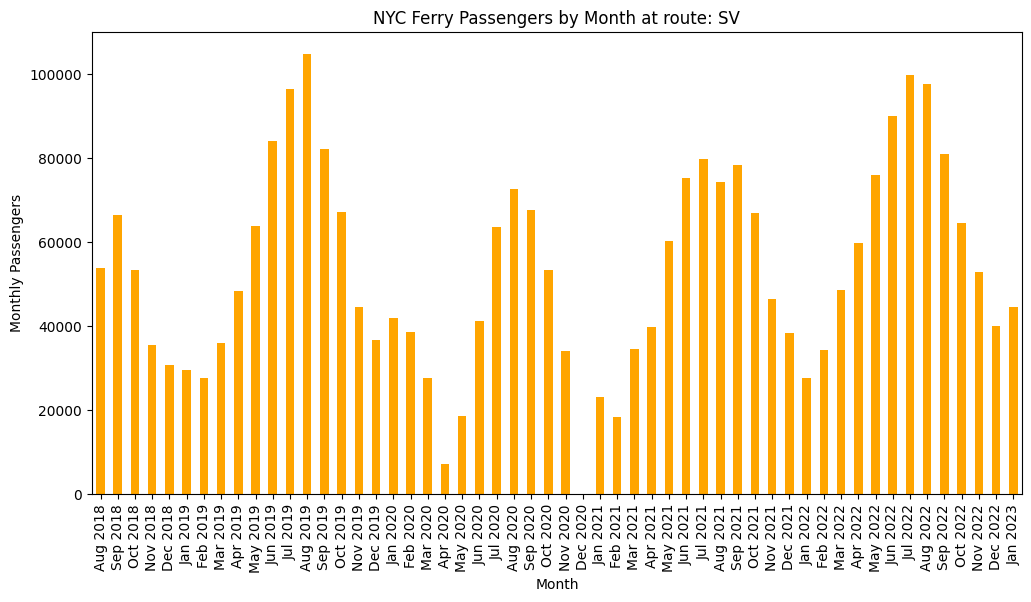

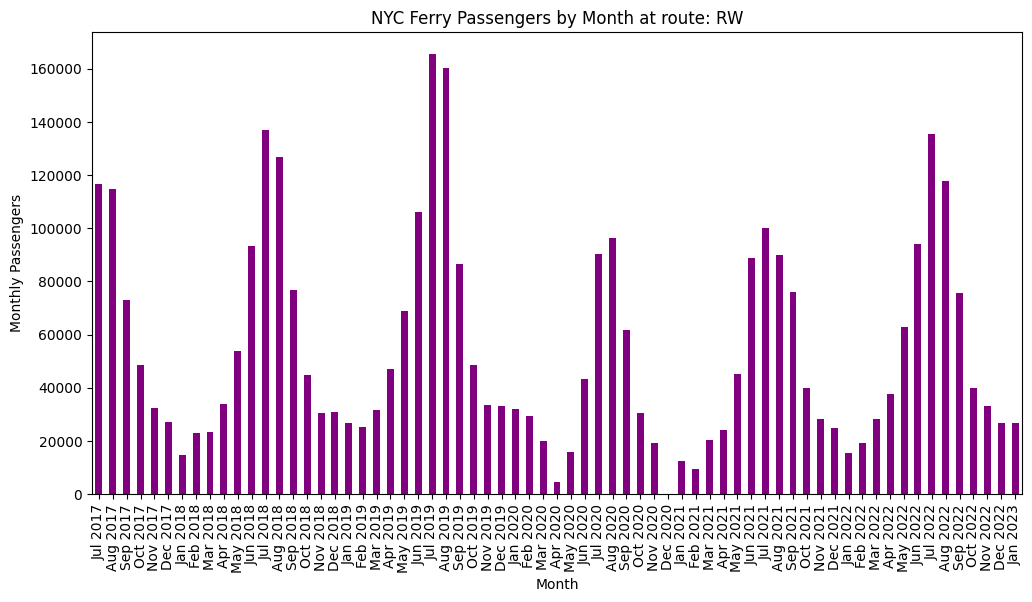

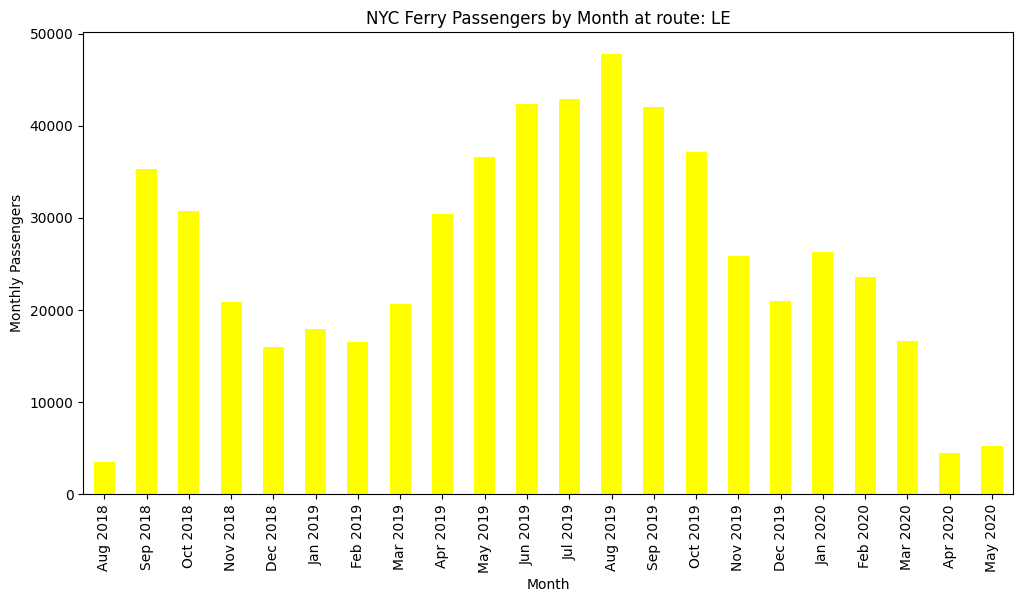

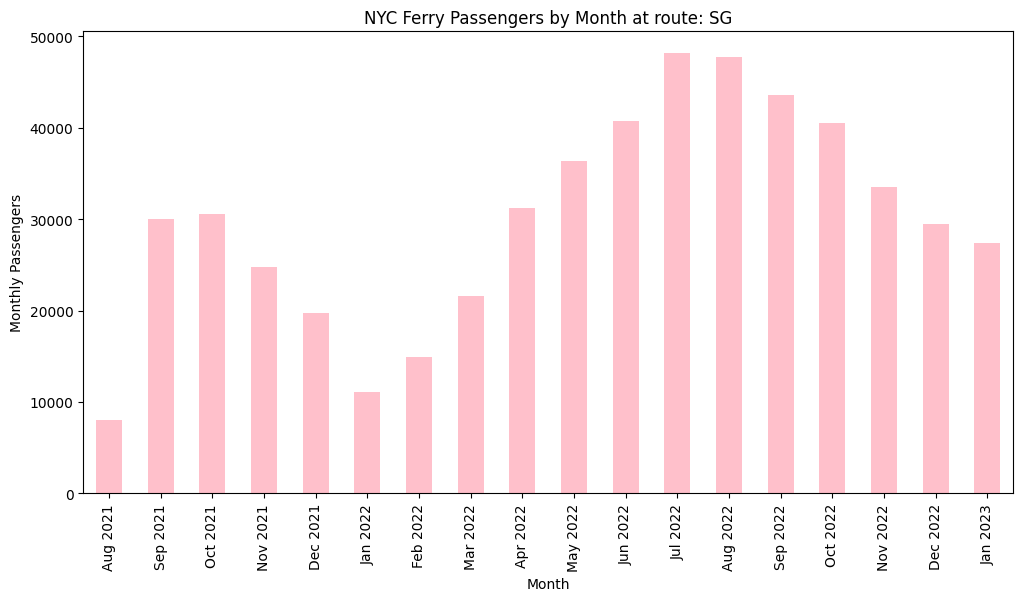

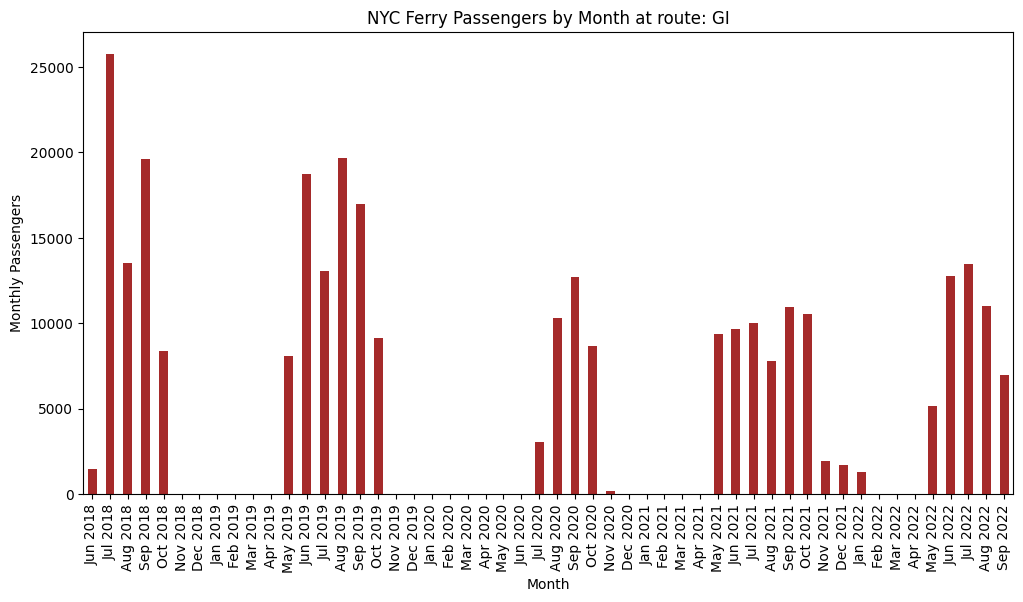

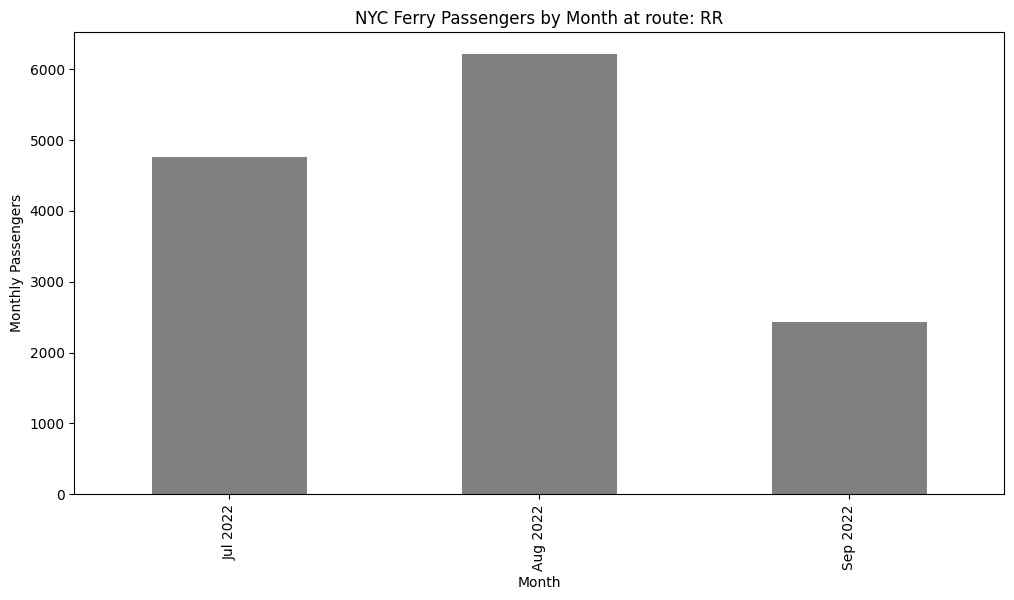

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray']

for i, item in enumerate(Routes):
  tmp = df.loc[df['Route'] == item]
  tmp_monthly_data = tmp.resample('M', on='Date')['Boardings'].sum()

  tmp_monthly_data.index = tmp_monthly_data.index.strftime('%b %Y')
  # Create a bar chart of the monthly data
  fig = plt.figure(figsize=(12, 6))
  tmp_monthly_data.plot(kind='bar', color=colors[i])

  # Set the axis labels and title
  plt.xlabel('Month')
  plt.ylabel('Monthly Passengers')
  plt.title('NYC Ferry Passengers by Month at route: {}'.format(item))
  #plt.axvline(x='Sep 2022', color='black', label='axvline - full height')

  # Show the plot
  plt.show()


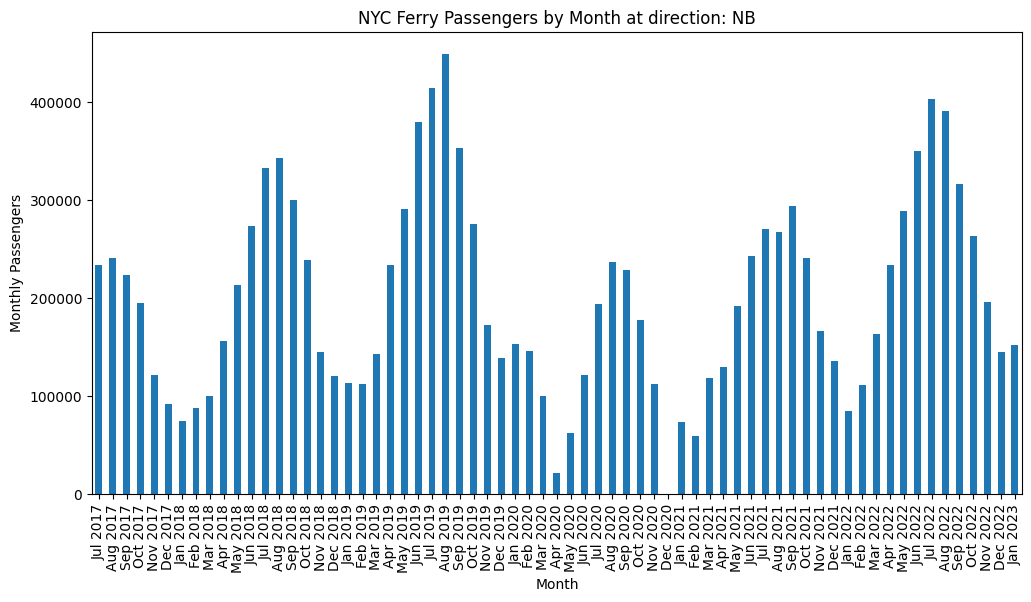

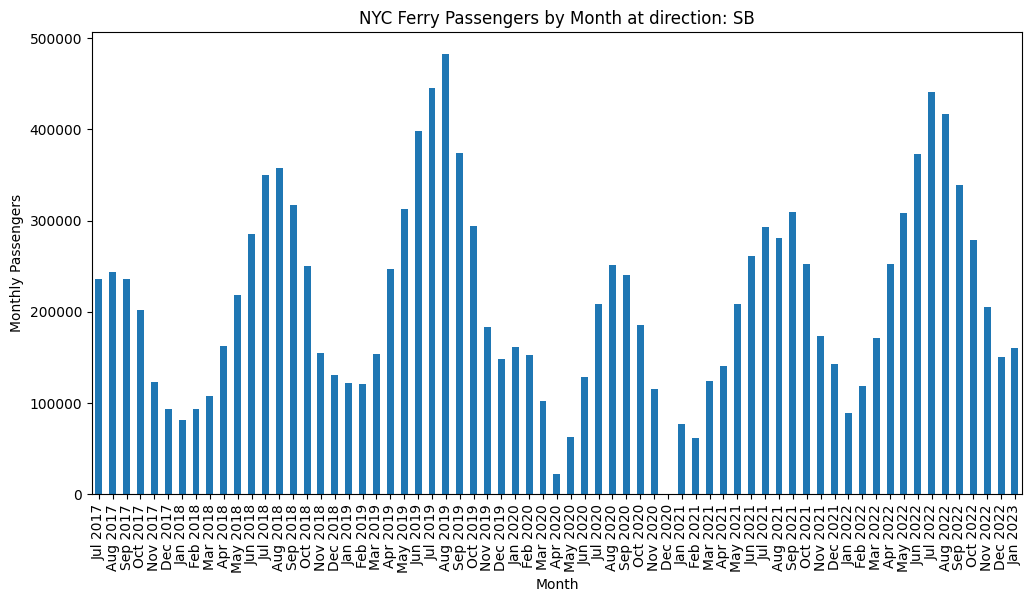

In [ ]:
for item in Direction:
  tmp = df.loc[df['Direction'] == item]
  tmp_monthly_data = tmp.resample('M', on='Date')['Boardings'].sum()

  tmp_monthly_data.index = tmp_monthly_data.index.strftime('%b %Y')
  # Create a bar chart of the monthly data
  fig = plt.figure(figsize=(12, 6))
  tmp_monthly_data.plot(kind='bar')

  # Set the axis labels and title
  plt.xlabel('Month')
  plt.ylabel('Monthly Passengers')
  plt.title('NYC Ferry Passengers by Month at direction: {}'.format(item))
  #plt.axvline(x='Sep 2022', color='black', label='axvline - full height')

  # Show the plot
  plt.show()

In [ ]:
tmp_ER = df.loc[df['Route'] == 'ER']
tmp_monthly_data_ER = tmp_ER.resample('M', on='Date')['Boardings'].sum()

tmp_monthly_data.index_ER = tmp_monthly_data_ER.index.strftime('%b %Y')

In [ ]:
tmp_monthly_data_ER = pd.DataFrame(data = tmp_monthly_data_ER)

In [ ]:
tmp_monthly_data_ER

,Boardings
Date,
2017-07-31,253239.0
2017-08-31,269461.0
2017-09-30,212380.0
2017-10-31,199916.0
2017-11-30,124454.0
...,...
2022-09-30,227856.0
2022-10-31,198242.0
2022-11-30,143531.0


In [ ]:
tmp_monthly_data_ER['Fare'] = np.nan
tmp_monthly_data_ER

,Boardings,Fare
Date,,
2017-07-31,253239.0,NaN
2017-08-31,269461.0,NaN
2017-09-30,212380.0,NaN
2017-10-31,199916.0,NaN
2017-11-30,124454.0,NaN
...,...,...
2022-09-30,227856.0,NaN
2022-10-31,198242.0,NaN
2022-11-30,143531.0,NaN


In [ ]:
for i in range(0, 62):
  tmp_monthly_data_ER['Fare'][i] = 2.75
for i in range(62, len(tmp_monthly_data_ER)):
  tmp_monthly_data_ER['Fare'][i] = 4.00

In [ ]:
tmp_monthly_data_ER

,Boardings,Fare
Date,,
2017-07-31,253239.0,2.75
2017-08-31,269461.0,2.75
2017-09-30,212380.0,2.75
2017-10-31,199916.0,2.75
2017-11-30,124454.0,2.75
...,...,...
2022-09-30,227856.0,4.00
2022-10-31,198242.0,4.00
2022-11-30,143531.0,4.00


In [ ]:
tmp_monthly_data_ER['Revenue'] = np.nan
tmp_monthly_data_ER

,Boardings,Fare,Revenue
Date,,,
2017-07-31,253239.0,2.75,NaN
2017-08-31,269461.0,2.75,NaN
2017-09-30,212380.0,2.75,NaN
2017-10-31,199916.0,2.75,NaN
2017-11-30,124454.0,2.75,NaN
...,...,...,...
2022-09-30,227856.0,4.00,NaN
2022-10-31,198242.0,4.00,NaN
2022-11-30,143531.0,4.00,NaN


In [ ]:
#Calculating the revenue

#Assuming 50% tourists and 50% frequent travelers until 08/22
#and 39% tourists, 48% frequent travelers and 13% senior citizens/kids after 08/22
#Acc to the survey report we have

for i in range(0, 62):
  tmp_monthly_data_ER['Revenue'][i] = (0.5*tmp_monthly_data_ER['Fare'][i] * tmp_monthly_data_ER['Boardings'][i]) + (0.5*2*tmp_monthly_data_ER['Boardings'][i])
for i in range(62, len(tmp_monthly_data_ER)):
  tmp_monthly_data_ER['Revenue'][i] = (0.39*tmp_monthly_data_ER['Fare'][i] * tmp_monthly_data_ER['Boardings'][i]) + (0.48*2.75*tmp_monthly_data_ER['Boardings'][i]) + (0.13*1.35*tmp_monthly_data_ER['Boardings'][i])                                                            

In [ ]:
start_date = '2017-07-31'
end_date = '2023-01-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='1M')

last_days_of_month = date_range + pd.offsets.MonthEnd(0)

tmp_monthly_data_ER['Date'] = last_days_of_month
tmp_monthly_data_ER

,Boardings,Fare,Revenue,Date
Date,,,,
2017-07-31,253239.0,2.75,601442.6250,2017-07-31
2017-08-31,269461.0,2.75,639969.8750,2017-08-31
2017-09-30,212380.0,2.75,504402.5000,2017-09-30
2017-10-31,199916.0,2.75,474800.5000,2017-10-31
2017-11-30,124454.0,2.75,295578.2500,2017-11-30
...,...,...,...,...
2022-09-30,227856.0,4.00,696214.0080,2022-09-30
2022-10-31,198242.0,4.00,605728.4310,2022-10-31
2022-11-30,143531.0,4.00,438558.9705,2022-11-30


Text(0, 0.5, 'Revenue in $')

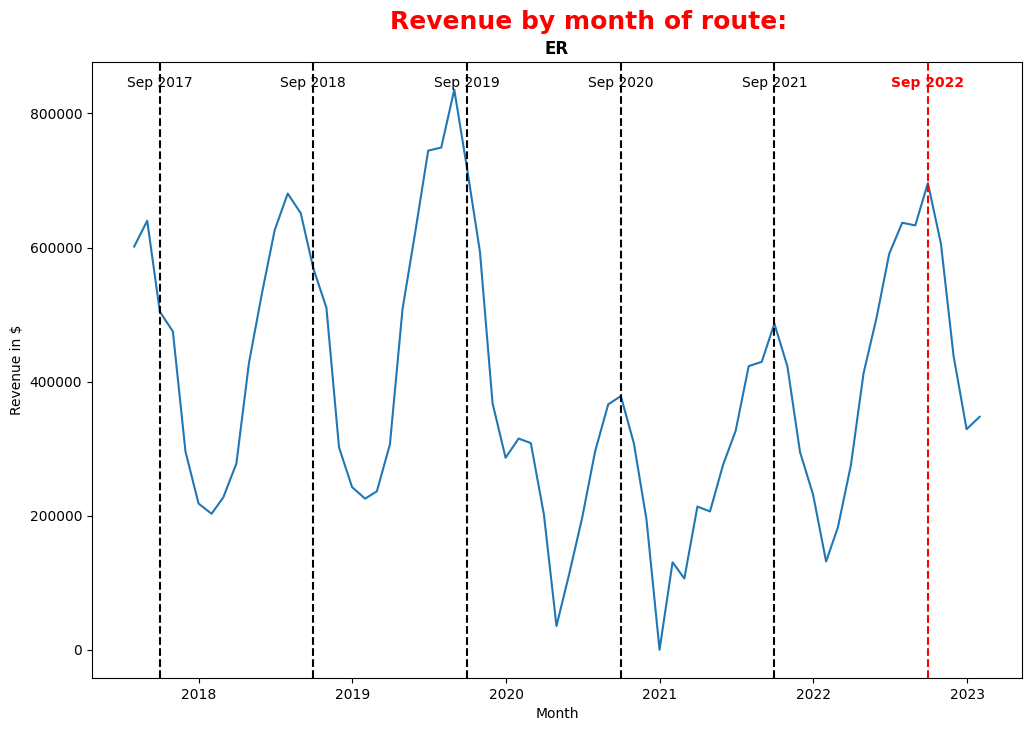

In [ ]:
fig = plt.figure(figsize=(12, 8))


plt.plot(tmp_monthly_data_ER['Date'], tmp_monthly_data_ER['Revenue'])

years = range(2017, 2023)

# Loop through the years and add a vertical line for the last day of September
for year in years:
    target_date = pd.to_datetime(f"{year}-09-30")
    xpos = mdates.date2num(target_date)
    if year == 2022:
        plt.axvline(x=xpos, color='red', linestyle='--')
        plt.text(xpos, max(tmp_monthly_data_ER['Revenue']), 'Sep 2022', ha='center', va='bottom', color='red', fontweight='bold')
    else:
        plt.axvline(x=xpos, color='black', linestyle='--')
        plt.text(xpos, max(tmp_monthly_data_ER['Revenue']), f'Sep {year}', ha='center', va='bottom')

title = 'ER'
title_obj = plt.title(title, loc='center', fontweight='bold')
subtitle_obj = plt.text(0.32, 1.04, 'Revenue by month of route:', color='red', transform=title_obj.get_transform(), fontweight='bold')
plt.setp(subtitle_obj, fontsize=18)
plt.xlabel('Month')
plt.ylabel('Revenue in $')

Text(0, 0.5, 'Revenue in $')

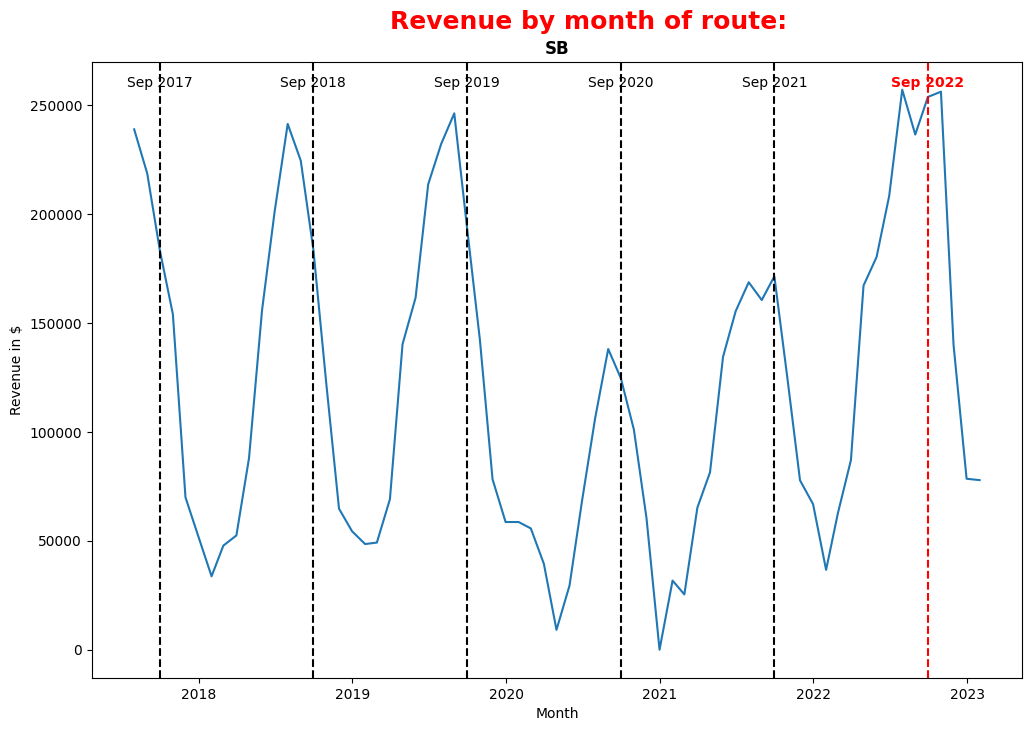

In [ ]:
tmp_SB = df.loc[df['Route'] == 'SB']
tmp_monthly_data_SB = tmp_SB.resample('M', on='Date')['Boardings'].sum()

tmp_monthly_data.index_SB = tmp_monthly_data_SB.index.strftime('%b %Y')

tmp_monthly_data_SB = pd.DataFrame(data = tmp_monthly_data_SB)
tmp_monthly_data_SB['Fare'] = np.nan

for i in range(0, 62):
  tmp_monthly_data_SB['Fare'][i] = 2.75
for i in range(62, len(tmp_monthly_data_SB)):
  tmp_monthly_data_SB['Fare'][i] = 4.00

tmp_monthly_data_SB['Revenue'] = np.nan

for i in range(0, 62):
  tmp_monthly_data_SB['Revenue'][i] = (0.5*tmp_monthly_data_SB['Fare'][i] * tmp_monthly_data_SB['Boardings'][i]) + (0.5*2*tmp_monthly_data_SB['Boardings'][i])
for i in range(62, len(tmp_monthly_data_SB)):
  tmp_monthly_data_SB['Revenue'][i] = (0.39*tmp_monthly_data_SB['Fare'][i] * tmp_monthly_data_SB['Boardings'][i]) + (0.48*2.75*tmp_monthly_data_SB['Boardings'][i]) + (0.13*1.35*tmp_monthly_data_SB['Boardings'][i])                                                            

tmp_monthly_data_SB['Date'] = last_days_of_month

fig = plt.figure(figsize=(12, 8))


plt.plot(tmp_monthly_data_SB['Date'], tmp_monthly_data_SB['Revenue'])

years = range(2017, 2023)

# Loop through the years and add a vertical line for the last day of September
for year in years:
    target_date = pd.to_datetime(f"{year}-09-30")
    xpos = mdates.date2num(target_date)
    if year == 2022:
        plt.axvline(x=xpos, color='red', linestyle='--')
        plt.text(xpos, max(tmp_monthly_data_SB['Revenue']), 'Sep 2022', ha='center', va='bottom', color='red', fontweight='bold')
    else:
        plt.axvline(x=xpos, color='black', linestyle='--')
        plt.text(xpos, max(tmp_monthly_data_SB['Revenue']), f'Sep {year}', ha='center', va='bottom')

title = 'SB'
title_obj = plt.title(title, loc='center', fontweight='bold')
subtitle_obj = plt.text(0.32, 1.04, 'Revenue by month of route:', color='red', transform=title_obj.get_transform(), fontweight='bold')
plt.setp(subtitle_obj, fontsize=18)
plt.xlabel('Month')
plt.ylabel('Revenue in $')

Text(0, 0.5, 'Revenue in $')

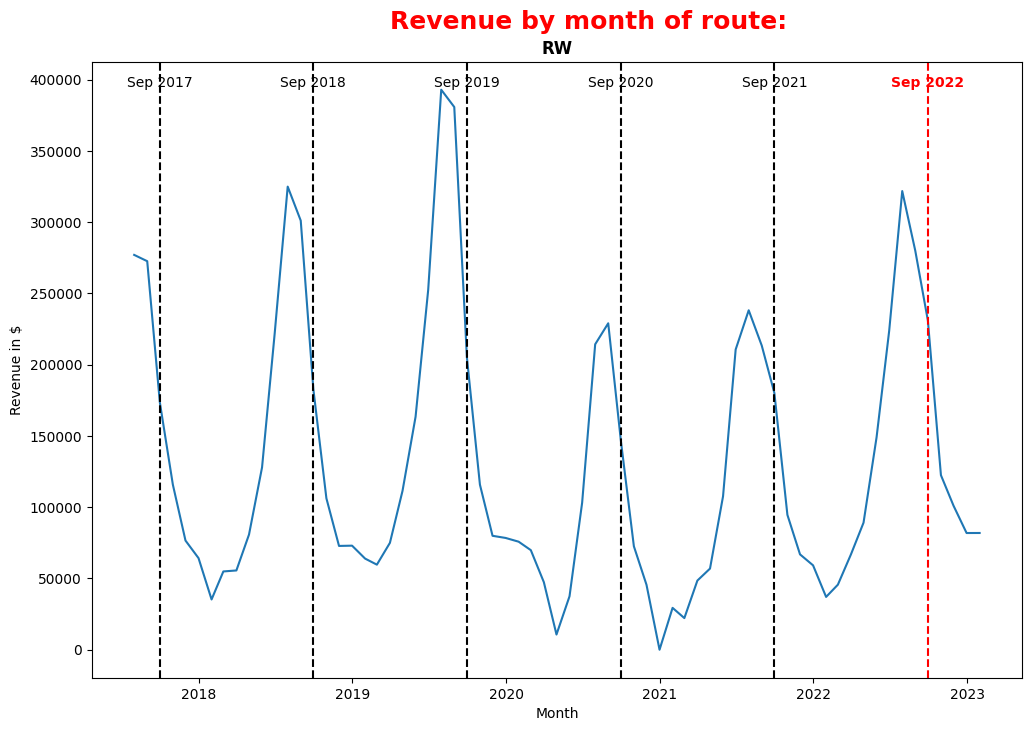

In [ ]:
tmp_RW = df.loc[df['Route'] == 'RW']
tmp_monthly_data_RW = tmp_RW.resample('M', on='Date')['Boardings'].sum()

tmp_monthly_data.index_RW = tmp_monthly_data_RW.index.strftime('%b %Y')

tmp_monthly_data_RW = pd.DataFrame(data = tmp_monthly_data_RW)
tmp_monthly_data_RW['Fare'] = np.nan

for i in range(0, 62):
  tmp_monthly_data_RW['Fare'][i] = 2.75
for i in range(62, len(tmp_monthly_data_RW)):
  tmp_monthly_data_RW['Fare'][i] = 4.00

tmp_monthly_data_RW['Revenue'] = np.nan

for i in range(0, 62):
  tmp_monthly_data_RW['Revenue'][i] = (0.5*tmp_monthly_data_RW['Fare'][i] * tmp_monthly_data_RW['Boardings'][i]) + (0.5*2*tmp_monthly_data_RW['Boardings'][i])
for i in range(62, len(tmp_monthly_data_RW)):
  tmp_monthly_data_RW['Revenue'][i] = (0.39*tmp_monthly_data_RW['Fare'][i] * tmp_monthly_data_RW['Boardings'][i]) + (0.48*2.75*tmp_monthly_data_RW['Boardings'][i]) + (0.13*1.35*tmp_monthly_data_RW['Boardings'][i])                                                            

tmp_monthly_data_RW['Date'] = last_days_of_month

fig = plt.figure(figsize=(12, 8))


plt.plot(tmp_monthly_data_RW['Date'], tmp_monthly_data_RW['Revenue'])

years = range(2017, 2023)

# Loop through the years and add a vertical line for the last day of September
for year in years:
    target_date = pd.to_datetime(f"{year}-09-30")
    xpos = mdates.date2num(target_date)
    if year == 2022:
        plt.axvline(x=xpos, color='red', linestyle='--')
        plt.text(xpos, max(tmp_monthly_data_RW['Revenue']), 'Sep 2022', ha='center', va='bottom', color='red', fontweight='bold')
    else:
        plt.axvline(x=xpos, color='black', linestyle='--')
        plt.text(xpos, max(tmp_monthly_data_RW['Revenue']), f'Sep {year}', ha='center', va='bottom')

title = 'RW'
title_obj = plt.title(title, loc='center', fontweight='bold')
subtitle_obj = plt.text(0.32, 1.04, 'Revenue by month of route:', color='red', transform=title_obj.get_transform(), fontweight='bold')
plt.setp(subtitle_obj, fontsize=18)
plt.xlabel('Month')
plt.ylabel('Revenue in $')

Text(0, 0.5, 'Revenue in $')

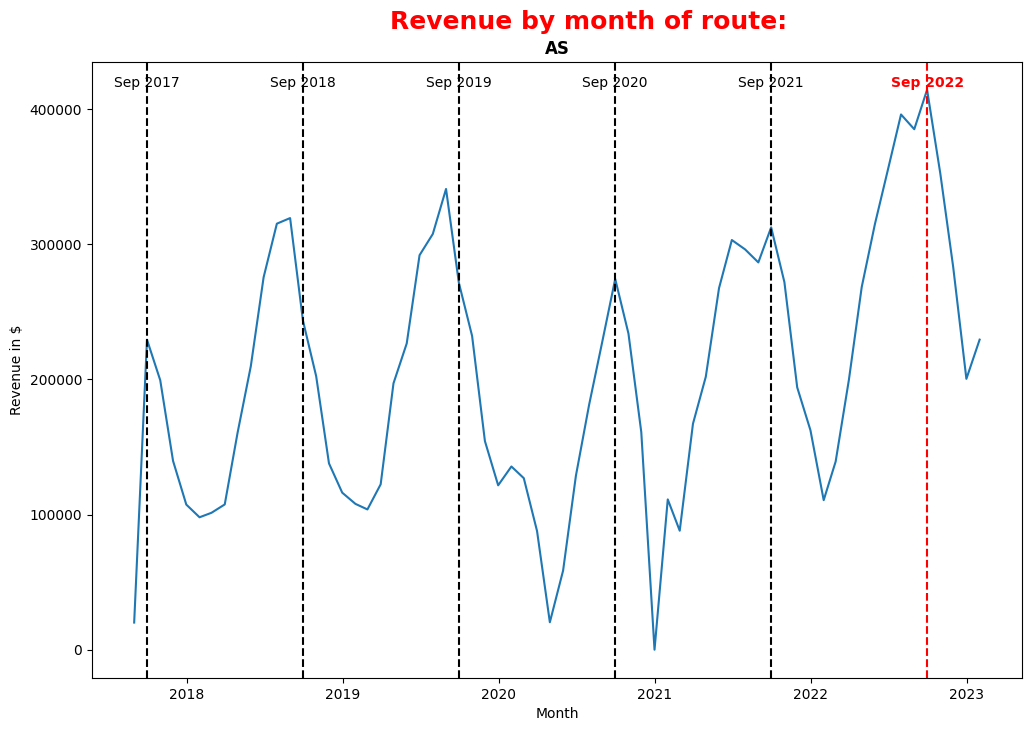

In [ ]:
tmp_AS = df.loc[df['Route'] == 'AS']
tmp_monthly_data_AS = tmp_AS.resample('M', on='Date')['Boardings'].sum()

tmp_monthly_data.index_AS = tmp_monthly_data_AS.index.strftime('%b %Y')

tmp_monthly_data_AS = pd.DataFrame(data = tmp_monthly_data_AS)
tmp_monthly_data_AS['Fare'] = np.nan

for i in range(0, 61):
  tmp_monthly_data_AS['Fare'][i] = 2.75
for i in range(61, len(tmp_monthly_data_AS)):
  tmp_monthly_data_AS['Fare'][i] = 4.00

tmp_monthly_data_AS['Revenue'] = np.nan

for i in range(0, 61):
  tmp_monthly_data_AS['Revenue'][i] = (0.5*tmp_monthly_data_AS['Fare'][i] * tmp_monthly_data_AS['Boardings'][i]) + (0.5*2*tmp_monthly_data_AS['Boardings'][i])
for i in range(61, len(tmp_monthly_data_AS)):
  tmp_monthly_data_AS['Revenue'][i] = (0.39*tmp_monthly_data_AS['Fare'][i] * tmp_monthly_data_AS['Boardings'][i]) + (0.48*2.75*tmp_monthly_data_AS['Boardings'][i]) + (0.13*1.35*tmp_monthly_data_AS['Boardings'][i])                                                            

start_date = '2017-08-31'
end_date = '2023-01-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='1M')

last_days_of_month = date_range + pd.offsets.MonthEnd(0)

tmp_monthly_data_AS['Date'] = last_days_of_month

fig = plt.figure(figsize=(12, 8))


plt.plot(tmp_monthly_data_AS['Date'], tmp_monthly_data_AS['Revenue'])

years = range(2017, 2023)

# Loop through the years and add a vertical line for the last day of September
for year in years:
    target_date = pd.to_datetime(f"{year}-09-30")
    xpos = mdates.date2num(target_date)
    if year == 2022:
        plt.axvline(x=xpos, color='red', linestyle='--')
        plt.text(xpos, max(tmp_monthly_data_AS['Revenue']), 'Sep 2022', ha='center', va='bottom', color='red', fontweight='bold')
    else:
        plt.axvline(x=xpos, color='black', linestyle='--')
        plt.text(xpos, max(tmp_monthly_data_AS['Revenue']), f'Sep {year}', ha='center', va='bottom')

title = 'AS'
title_obj = plt.title(title, loc='center', fontweight='bold')
subtitle_obj = plt.text(0.32, 1.04, 'Revenue by month of route:', color='red', transform=title_obj.get_transform(), fontweight='bold')
plt.setp(subtitle_obj, fontsize=18)
plt.xlabel('Month')
plt.ylabel('Revenue in $')

Text(0, 0.5, 'Revenue in $')

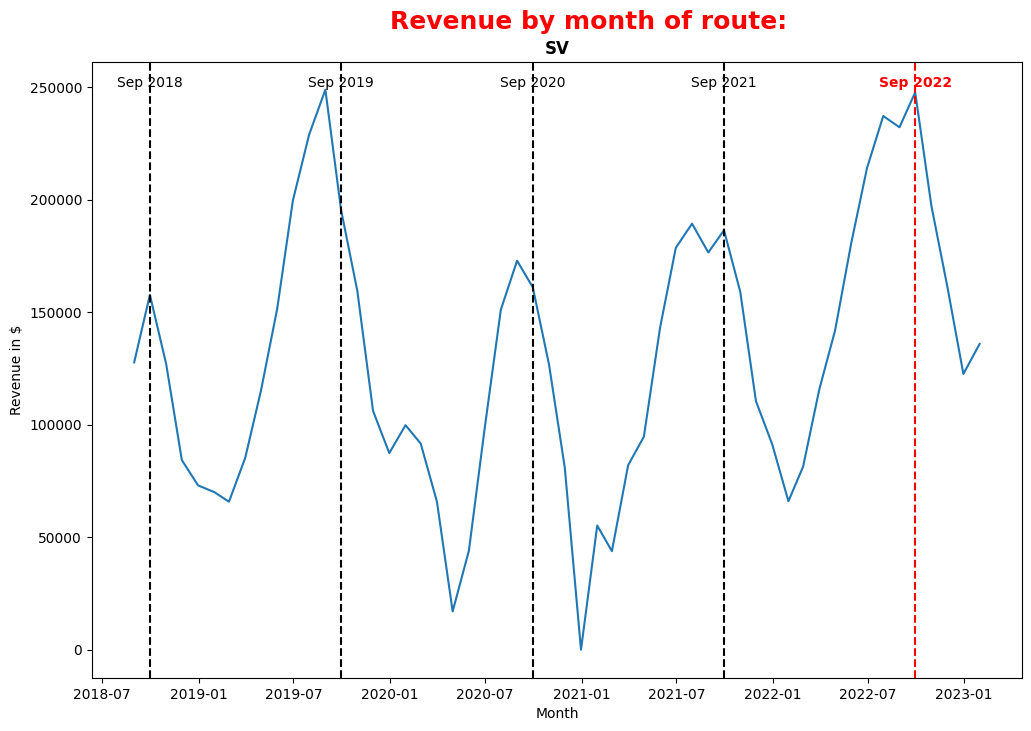

In [ ]:
tmp_SV = df.loc[df['Route'] == 'SV']
tmp_monthly_data_SV = tmp_SV.resample('M', on='Date')['Boardings'].sum()

tmp_monthly_data.index_SV = tmp_monthly_data_SV.index.strftime('%b %Y')

tmp_monthly_data_SV = pd.DataFrame(data = tmp_monthly_data_SV)
tmp_monthly_data_SV['Fare'] = np.nan

for i in range(0, 49):
  tmp_monthly_data_SV['Fare'][i] = 2.75
for i in range(49, len(tmp_monthly_data_SV)):
  tmp_monthly_data_SV['Fare'][i] = 4.00

tmp_monthly_data_SV['Revenue'] = np.nan

for i in range(0, 49):
  tmp_monthly_data_SV['Revenue'][i] = (0.5*tmp_monthly_data_SV['Fare'][i] * tmp_monthly_data_SV['Boardings'][i]) + (0.5*2*tmp_monthly_data_SV['Boardings'][i])
for i in range(49, len(tmp_monthly_data_SV)):
  tmp_monthly_data_SV['Revenue'][i] = (0.39*tmp_monthly_data_SV['Fare'][i] * tmp_monthly_data_SV['Boardings'][i]) + (0.48*2.75*tmp_monthly_data_SV['Boardings'][i]) + (0.13*1.35*tmp_monthly_data_SV['Boardings'][i])                                                            

start_date = '2018-08-31'
end_date = '2023-01-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='1M')

last_days_of_month = date_range + pd.offsets.MonthEnd(0)

tmp_monthly_data_SV['Date'] = last_days_of_month

fig = plt.figure(figsize=(12, 8))


plt.plot(tmp_monthly_data_SV['Date'], tmp_monthly_data_SV['Revenue'])

years = range(2018, 2023)

# Loop through the years and add a vertical line for the last day of September
for year in years:
    target_date = pd.to_datetime(f"{year}-09-30")
    xpos = mdates.date2num(target_date)
    if year == 2022:
        plt.axvline(x=xpos, color='red', linestyle='--')
        plt.text(xpos, max(tmp_monthly_data_SV['Revenue']), 'Sep 2022', ha='center', va='bottom', color='red', fontweight='bold')
    else:
        plt.axvline(x=xpos, color='black', linestyle='--')
        plt.text(xpos, max(tmp_monthly_data_SV['Revenue']), f'Sep {year}', ha='center', va='bottom')

title = 'SV'
title_obj = plt.title(title, loc='center', fontweight='bold')
subtitle_obj = plt.text(0.32, 1.04, 'Revenue by month of route:', color='red', transform=title_obj.get_transform(), fontweight='bold')
plt.setp(subtitle_obj, fontsize=18)
plt.xlabel('Month')
plt.ylabel('Revenue in $')

In [ ]:
tmp_monthly_data_ER.to_csv("tmp_monthly_data_ER.csv")
tmp_monthly_data_SB.to_csv("tmp_monthly_data_SB.csv")
tmp_monthly_data_AS.to_csv("tmp_monthly_data_AS.csv")
tmp_monthly_data_SV.to_csv("tmp_monthly_data_SV.csv")
tmp_monthly_data_RW.to_csv("tmp_monthly_data_RW.csv")